# Create Figure 1 for PTEN

This notebook creates a histogram that shows the different PTEN mutations found in 9 cancers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import plot_utils as ut

# Step 1: Create data frames with Mutation Types

For each cancer type, create a data frame that has the mutation type for each sample.

First, load in the cancer data sets from cptac.

In [2]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
ls = cptac.Lscc()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()

cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 2)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)


version 3scc v3.2.......                 


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 4)


cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 8)


In [3]:
def plot_mutations(dflist = None, names_of_df=None):
    number_of_df = len(dflist)
    
    allLabels = []
    for df in dflist:
        #get the labels for each and make a combined label that they'll all use
        mutation = df["Mutation"]
        labels = set(mutation)
        allLabels.append(labels)

    
    flat_list = [item for sublist in allLabels for item in sublist]
    all_labels = list(set(flat_list))
    all_labels.sort()
    allLabels = all_labels
    
#     For each df, add na to their labels if it doesn't exist in all_labels
    labels_for_each_df = []
    frequencies_for_each_df = []
    for df in dflist:
        mutation = df["Mutation"].tolist()
        mutationlist = list(set(mutation))
        mutationlist.sort()
        ordered_mut_list = []
        match = True
        mutPosition = 0
        
        for position in range(len(all_labels)):
            try:
                
                if mutationlist[mutPosition] == all_labels[position]:
                    ordered_mut_list.append(mutationlist[mutPosition])
                    mutPosition += 1

                else:
                    ordered_mut_list.append("na")

            except IndexError:  
                ordered_mut_list.append("na")
       
        
        labels_for_each_df.append(ordered_mut_list)

        #get the freq of each mutation type
        freq = []
        for mutation_type in ordered_mut_list:
            freq.append(mutation.count(mutation_type))

        PercentFreq = [x*100 / sum(freq) for x in freq]
        frequencies_for_each_df.append(PercentFreq)
        
        
    #Now plot it using arrays
    width = 0.1
    x = np.arange(len(allLabels))
    a4_dims = (13, 10) #dimensions for bigger plot
    fig, ax = plt.subplots(figsize=a4_dims)
    for position in range(0, number_of_df):
        r = ax.bar(x+(width*position), frequencies_for_each_df[position], width,label=names_of_df[position], alpha=.5, linewidth=0)
        
    
    ax.set_xticks(x)
    ax.set_xticklabels(allLabels, size = 15)
    ax.set_ylabel('Percent Sample', size = 20)
    ax.yaxis.set_tick_params(labelsize=17)
    plt.ylim(0, 100)
    ax.legend(prop={'size': 15})
    

    fig.tight_layout()
    plt.setp(ax.get_xticklabels(),rotation=45)
    plt.show()
    
    #save fig
    fig.savefig("Step_1_PTEN.png", bbox_inches="tight", dpi = 300)
    

Second, call get_geneotype_all_vars for PTEN for each cancer type. This returns a df with columns for Mutation (type of mutation), Location (location of the mutation), and Mutation_Status (wildtype or mutation count).

In [4]:
gene = "PTEN"

In [5]:
endo = en.get_genotype_all_vars(gene)
gbm = g.get_genotype_all_vars(gene)
hnscc = hn.get_genotype_all_vars(gene)
ovar = o.get_genotype_all_vars(gene)
cc = c.get_genotype_all_vars(gene)
colon = col.get_genotype_all_vars(gene)
ld = l.get_genotype_all_vars(gene)
lscc = ls.get_genotype_all_vars(gene)
brca = b.get_genotype_all_vars(gene)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 20 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 313)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 72 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 313)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 313)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 109 samples for

# Step 2: Match Mutation Labels

The Colon dataset labeled their mutations slightly differently. Nonsynonymous snv in this case is a missense mutation. Nonframeshift insertion was changed to match In_Frame_Ins. Frameshift deletion was canged to match Frame_Shift_Del.

In [6]:
colon["Mutation"] = colon['Mutation'].replace(['nonsynonymous SNV'], 'Missense_Mutation')

colon["Mutation"] = colon['Mutation'].replace(['nonframeshift insertion'], 'In_Frame_Ins')

colon["Mutation"] = colon['Mutation'].replace(['frameshift deletion'], 'Frame_Shift_Del')

In [7]:
#combine to make indel mutation type 
lscc["Mutation"] = lscc['Mutation'].replace(['In_Frame_Del'], 'In_Frame_Indel')

#combine to make truncation muatation type
nonsense = [endo, ovar, cc, brca, lscc]
for df in nonsense:
    df["Mutation"] = df['Mutation'].replace(['Nonsense_Mutation'], 'Truncating') 
    
frame_shift_del = [endo, ovar, colon, brca, lscc]
for df in frame_shift_del:
    df["Mutation"] = df['Mutation'].replace(['Frame_Shift_Del'], 'Truncating')
    
frame_shift_ins = [endo]
for df in frame_shift_ins:
    df["Mutation"] = df['Mutation'].replace(['Frame_Shift_Ins'], 'Truncating')

The get_genotype_all_var function created the No_Mutation label when no somatic mutations were found for PTEN in the Luad dataset. This is the same as Wildtype_Tumor. 

In [8]:
ld["Mutation"] = ld['Mutation'].replace(['No_Mutation'], 'Wildtype_Tumor')

Get % of Deletions

In [29]:
cancer_dfs = {'Endo':endo, 'Gbm':gbm, 'Hnscc':hnscc, 'Ov':ovar, 'K':cc, 'Colon':colon, 
              'Luad':ld, 'Brca':brca, 'Lscc':lscc}
for cancer in cancer_dfs:
    df = cancer_dfs[cancer]
    vc = df.Mutation.value_counts()
    total = len(df)
    cnv_del = vc.Deletion
    print(cancer)
    print('total_samples:',total,'\n')
    #print(vc, '\n')
    print(cnv_del,'/',total,'=', cnv_del/total,'\n')

Endo
total_samples: 95 

3 / 95 = 0.031578947368421054 

Gbm
total_samples: 99 

81 / 99 = 0.8181818181818182 

Hnscc
total_samples: 111 

18 / 111 = 0.16216216216216217 

Ov
total_samples: 102 

26 / 102 = 0.2549019607843137 

K
total_samples: 110 

11 / 110 = 0.1 

Colon
total_samples: 106 

25 / 106 = 0.2358490566037736 

Luad
total_samples: 109 

17 / 109 = 0.1559633027522936 

Brca
total_samples: 122 

24 / 122 = 0.19672131147540983 

Lscc
total_samples: 108 

52 / 108 = 0.48148148148148145 



# Step 3: Create Figure

Create a list of the mutation data frames. Create a list of cancer names for the figure legend. Call the plot_mutations function.

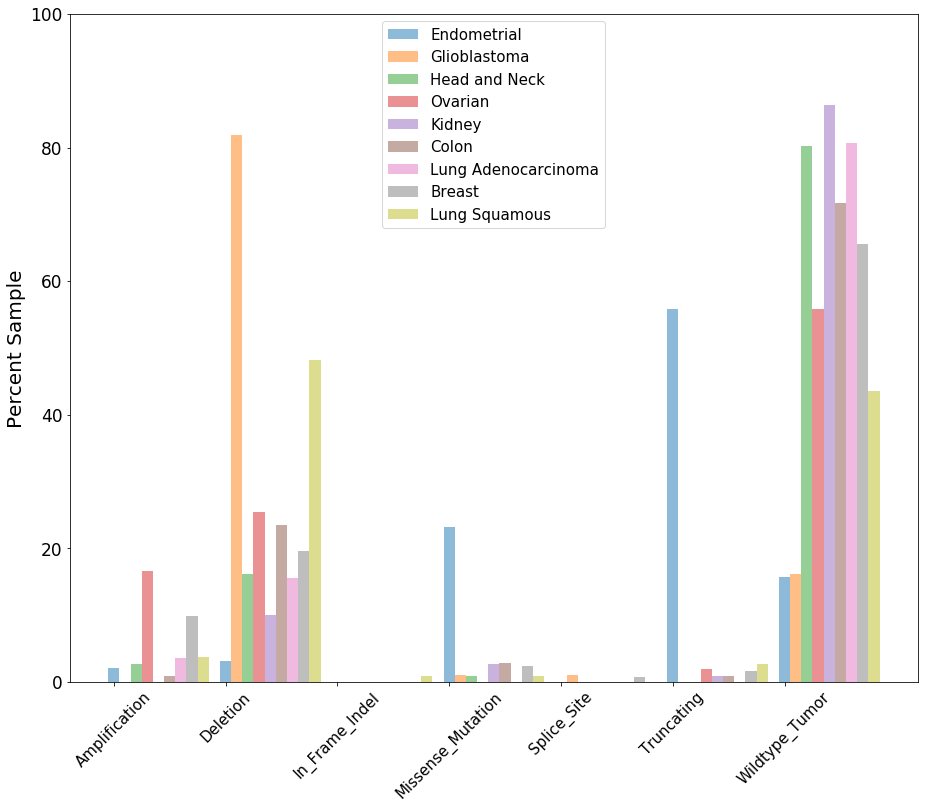

In [9]:
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Ovarian', 'Kidney', 'Colon', 'Lung Adenocarcinoma', 'Breast', 
         'Lung Squamous']
plot_mutations(dfs, names)